# Classifictaion Problem

In [24]:
# Required Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile 
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import r2_score

In [25]:
# load dataset 
dataset = pd.read_csv("breast-cancer(for classification).csv")

In [26]:
# show dataset shape 
dataset.shape

(569, 32)

In [27]:
# show 5 first rows in dataset 
dataset.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


# Pre-Processing 

In [28]:
# Check for NaN values
dataset.isna().sum() 

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [29]:
'''
    Show dataset info 
    To know what you should do in Pre-Processing
'''
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [30]:
'''
    Wont to encod text into integer 
'''
# Encod Text into integer by LabelEncoder
for column in dataset.columns :
    if dataset[column].dtype == "object":
        dataset[column] = LabelEncoder().fit_transform(dataset[[column]])

C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
# Show dataset after Encoding
dataset.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [32]:
# check if any outlire
for column in dataset.columns:
    # Calculate Q1, Q3, and IQR for the current column
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    dataset[column] = np.where((dataset[column] < lower_bound) | (dataset[column] > upper_bound), dataset[column].median(), dataset[column])



In [33]:
# Normalize dataset
dataset = MinMaxScaler(feature_range=(0,1)).fit_transform(dataset)

In [34]:
# Split data into features and target
data_x = dataset[:, :-1]  # Selects all rows and all columns except the last one
data_y = dataset[:,-1] # diagnosis

In [35]:
print("Features Shape",data_x.shape)
print("Target Shape",data_y.shape)

Features Shape (569, 31)
Target Shape (569,)


In [36]:
# select featues  
data_x = SelectPercentile(score_func=f_classif,percentile=30).fit_transform(data_x,data_y)

In [37]:
print("Features Shape after select features",data_x.shape)

Features Shape after select features (569, 9)


In [38]:
# split into train and test 
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.3,random_state=44,shuffle=True)

In [39]:
print("x_Treain Shape is :",x_train.shape)
print("x_Test Shape is :",x_test.shape)
print("y_Treain Shape is :",y_train.shape)
print("y_Test Shape is :",y_test.shape)

x_Treain Shape is : (398, 9)
x_Test Shape is : (171, 9)
y_Treain Shape is : (398,)
y_Test Shape is : (171,)


# Classification model

###  Logistic Regression Model

In [40]:
# Logistic Regression
lr = LogisticRegression(penalty='l2',solver='saga',C=1.0,random_state=11).fit(x_train,y_train)

In [41]:
# prediction
y_pred = lr.predict(x_test)
y_pred[:5]

array([1., 1., 0., 1., 0.])

In [42]:
# test and train score 
print("Train Score :",lr.score(x_train,y_train)) 
print("Teast Score :",lr.score(x_test,y_test))

Train Score : 0.9422110552763819
Teast Score : 0.9473684210526315


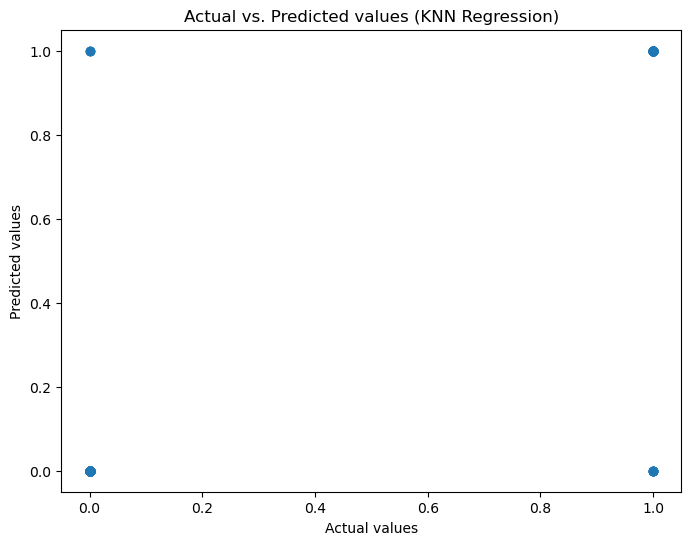

In [48]:
# Scatter plot for predicted vs. actual values insted of ROC curve
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values (KNN Regression)')
plt.show()

### Accuracy & Confusion matrix 

In [43]:
#Calculating Confusion Matrix 
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :")
print(cm)

Confusion Matrix :
[[105   3]
 [  6  57]]


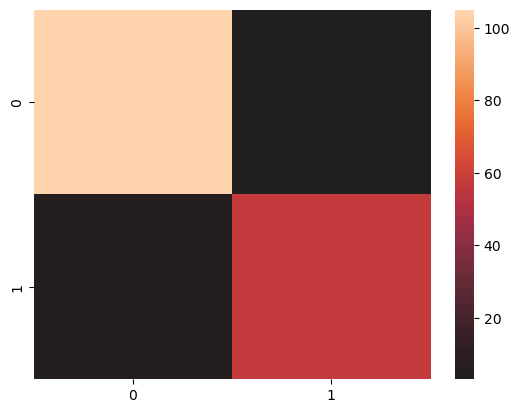

In [44]:
# Visualizing the confusion matrix
sns.heatmap(cm, center = True) 
plt.show() 

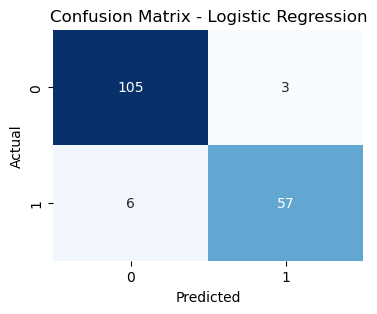

In [45]:
# Visualizing the confusion matrix another plot
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [46]:
# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy:.2f}")

Accuracy of the logistic regression model: 0.95


In [47]:
# Calculating R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

R-squared: 0.7738095238095237
